<a href="https://colab.research.google.com/github/jonitorta/Ejercicios_Machine_learning./blob/main/SVM_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### In this notebook I'll implement SVM with some variations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [2]:
def generate_rn(size,mean,std):
  """
  Generates a np.array of random points in R2
  """
  x = np.random.normal(loc=mean, scale = std, size = size)
  y = np.random.normal(loc=mean, scale = std, size = size)
  vec = list(zip(x,y))
  vec = np.array(vec)
  return vec

In [3]:
#Create two groups of random poits
size = 1000
first_class =  generate_rn(size = size, mean = -1 , std = 1)
second_class =  generate_rn(size = size, mean = 5 , std = 1)

In [63]:
#Create labels for each cat, let the first class be cat 0 and second one 1
labels = np.vstack((
    np.ones(shape = (size,1)) , np.zeros(shape = (size,1))
)).astype(np.float32)
labels.ravel()

array([1., 1., 1., ..., 0., 0., 0.], dtype=float32)

In [64]:
#Let's do the same with the data
data = np.vstack(
    (first_class,second_class)
).astype(np.float32)

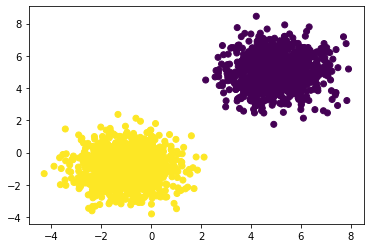

In [65]:
#Check the data
plt.scatter(data[:,0], data[:,1], c = labels)
plt.show()

In [66]:
#Define the worflow, first scale the data, then fit with the model
svm_clf = Pipeline([
                    ("Scaler", StandardScaler()),
                    ("Linear_svm", LinearSVC(C = 1, loss = "hinge" ))
])

In [67]:
#Let's fit the modle
svm_clf.fit(data,labels.ravel())

Pipeline(steps=[('Scaler', StandardScaler()),
                ('Linear_svm', LinearSVC(C=1, loss='hinge'))])

In [83]:
#Extract coefficients for the line, we have dot((x,y),(w0,w1)) + b = 0
coefs = svm_clf[1].coef_[0]
intercept = svm_clf[1].intercept_[0]

In [84]:
#Define the line function to check the classification
y = lambda x : -x * coefs[0]/coefs[1] - intercept/coefs[1]
x = np.linspace(start = -2 , stop = 4)
line = [y(val) for val in x]

In [85]:
#Rememeber standarize the data, as we did in the smv 
scaled_data = StandardScaler().fit_transform(data)

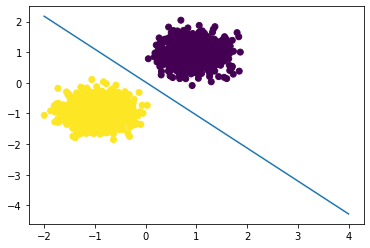

In [86]:
#Here we can see the fit is good
plt.plot(x, line )
plt.scatter(scaled_data[:,0], scaled_data[:,1], c = labels)
plt.show()